<br>

<div align=center><font color=maroon size=6><b>Overview: TensorFlow basics</b></font></div>

<br>

<font size=4><b>References:</b></font>
1. TF2 Core: <a href="https://www.tensorflow.org/guide" style="text-decoration:none;">TensorFlow Guide</a> 
    * `TensorFlow > Learn > TensorFlow Core > `Guide > <a href="https://www.tensorflow.org/guide/basics" style="text-decoration:none;">TensorFlow basics</a>
        * Run in <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/basics.ipynb" style="text-decoration:none;">Google Colab</a>

<br>
<br>
<br>

This guide provides a quick overview of _TensorFlow basics_. Each section of this doc is an overview of a larger topic—you can find links to full guides at the end of each section.

TensorFlow is an end-to-end platform for machine learning. It supports the following:

* Multidimensional-array based numeric computation (similar to <a href="https://numpy.org/" style="text-decoration:none;" class="external">NumPy</a>.)
* GPU and distributed processing
* Automatic differentiation
* Model construction, training, and export
* And more

<br>

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.0


<br>

## Tensors

TensorFlow operates on multidimensional arrays or _tensors_ represented as `tf.Tensor` objects. Here is a two-dimensional tensor:

In [3]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print()

print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)

(2, 3)
<dtype: 'float32'>


<br>

The most important attributes of a `tf.Tensor` are its `shape` and `dtype`:

* `Tensor.shape`: tells you the size of the tensor along each of its axes.
* `Tensor.dtype`: tells you the type of all the elements in the tensor.

<br>

TensorFlow implements standard mathematical operations on tensors, as well as many operations specialized for machine learning.

For example:

In [4]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

<br>

In [5]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

<br>

In [6]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

<br>

In [7]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [8]:
tf.concat([x, x], axis=1)

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6.]], dtype=float32)>

<br>

In [9]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

In [10]:
tf.nn.softmax(x, axis=-1).numpy().sum(axis=1)

array([0.99999994, 0.99999994], dtype=float32)

<br>

In [11]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [12]:
tf.reduce_sum(x).numpy()

21.0

In [13]:
tf.reduce_sum(x, axis=1).numpy()

array([ 6., 15.], dtype=float32)

<br>

Running large calculations on CPU can be slow. When properly configured, TensorFlow can use accelerator hardware like GPUs to execute operations very quickly.

In [14]:
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow **IS** using the GPU")
else:
    print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


<br>

Refer to the [Tensor guide](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/tensor.ipynb) for details.

<br>
<br>
<br>

## Variables

<font size=3 color=maroon>Normal `tf.Tensor` objects are immutable. To store model weights (or other mutable state) in TensorFlow use a `tf.Variable`.</font>

In [15]:
var = tf.Variable([0.0, 0.0, 0.0])

In [16]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [17]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

<br>

Refer to the [Variables guide](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/variable.ipynb) for details.

<br>

## Automatic differentiation

<a href="https://en.wikipedia.org/wiki/Gradient_descent" class="external">_Gradient descent_</a> and related algorithms are a cornerstone of modern machine learning.

To enable this, TensorFlow implements automatic differentiation (autodiff), which uses calculus to compute gradients. Typically you'll use this to calculate the gradient of a model's _error_ or _loss_ with respect to its weights.

In [18]:
x = tf.Variable(1.0)

def f(x):
    y = x**2 + 2*x - 5
    return y

In [19]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

<br>

At `x = 1.0`, `y = f(x) = (1**2 + 2*1 - 5) = -2`.

The derivative of `y` is `y' = f'(x) = (2*x + 2) = 4`. TensorFlow can calculate this automatically:

In [20]:
with tf.GradientTape() as tape:
    y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

<br>

This simplified example only takes the derivative with respect to a single scalar (`x`), but TensorFlow can compute the gradient with respect to any number of non-scalar tensors simultaneously.

Refer to the [Autodiff guide](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/autodiff.ipynb) for details.

<br>
<br>
<br>

## Graphs and tf.function

<font size=3 color=maroon>While you can use TensorFlow interactively like any Python library, TensorFlow also provides tools for:

* **Performance optimization**: to speed up training and inference.
* **Export**: so you can save your model when it's done training.

These require that you use `tf.function` to separate your pure-TensorFlow code from Python.</font>

In [21]:
@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

<br>

The first time you run the `tf.function`, although it executes in Python, it <font size=3 color=maroon>captures **a complete, optimized graph** representing the TensorFlow computations done within the function.</font>

In [22]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

<br>

<font size=3 color=maroon>On subsequent calls TensorFlow only executes the optimized graph, skipping any non-TensorFlow steps. 

Below, **note that** `my_func` doesn't print _tracing_ since `print` is a Python function, not a TensorFlow function.</font>

In [23]:
x = tf.constant([10, 9, 8])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

<br>

A graph may not be reusable for inputs with a different _signature_ (`shape` and `dtype`), so a new graph is generated instead:

In [24]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

<br>

<font size=3 color=maroon>These captured graphs provide two benefits:

* In many cases they provide a significant speedup in execution (though not this trivial example).
* You can export these graphs, using `tf.saved_model`, to run on other systems like a [server](https://www.tensorflow.org/tfx/serving/docker) or a [mobile device](https://www.tensorflow.org/lite/guide), no Python installation required.</font>

Refer to [Intro to graphs](intro_to_graphs.ipynb) for more details.

<br>
<br>
<br>

## Modules, layers, and models

<font size=3 color=maroon>`tf.Module` is a class for managing your `tf.Variable` objects, and the `tf.function` objects that operate on them. The `tf.Module` class is necessary to support two significant features:

1. You can save and restore the values of your variables using `tf.train.Checkpoint`. This is useful during training as it is quick to save and restore a model's state.


2. You can import and export the `tf.Variable` values _and_ the `tf.function` graphs using `tf.saved_model`. This allows you to run your model independently of the Python program that created it.</font>

Here is a complete example exporting a simple `tf.Module` object:

In [25]:
class MyModule(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)

    @tf.function
    def multiply(self, x):
        return x * self.weight

In [26]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

<br>

Save the `Module`:

In [27]:
save_path = './save_model/1-1'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./save_model/1-1\assets


<br>

<font size=3 color=maroon>The resulting SavedModel is independent of the code that created it. You can load a SavedModel from Python, other language bindings, or [TensorFlow Serving](https://www.tensorflow.org/tfx/serving/docker). You can also convert it to run with [TensorFlow Lite](https://www.tensorflow.org/lite/guide) or [TensorFlow JS](https://www.tensorflow.org/js/guide).</font>

In [28]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

<br>

<font size=4 color=maroon>The `tf.keras.layers.Layer` and `tf.keras.Model` classes build on `tf.Module` providing additional functionality and convenience methods for building, training, and saving models.</font> Some of these are demonstrated in the next section.

Refer to [Intro to modules](intro_to_modules.ipynb) for details.

<br>
<br>
<br>

## Training loops

Now put this all together to build a basic model and train it from scratch.

First, create some example data. This generates a cloud of points that loosely follows a quadratic curve:

In [29]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

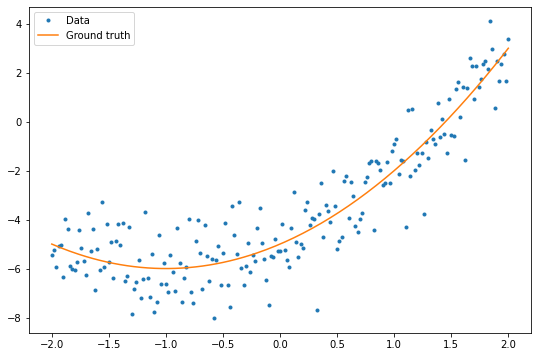

In [30]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend();

<br>

Create a model:

In [31]:
class Model(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=units,
                                            activation=tf.nn.relu,
                                            kernel_initializer=tf.random.normal,
                                            bias_initializer=tf.random.normal)
        self.dense2 = tf.keras.layers.Dense(1)

        
    def call(self, x, training=True):
    # For Keras layers/models, implement `call` instead of `__call__`.
        x = x[:, tf.newaxis]
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.squeeze(x, axis=1)

In [32]:
model = Model(64)

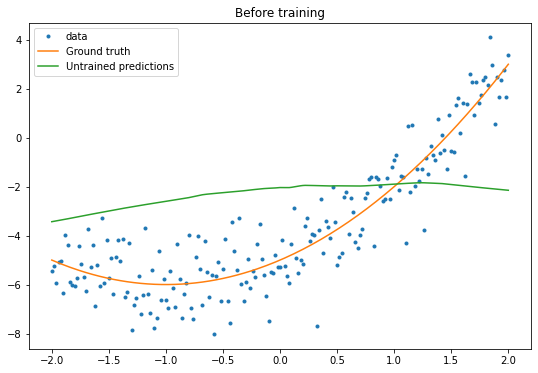

In [33]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

<br>

Write a basic training loop:

In [34]:
variables = model.variables

optimizer = tf.optimizers.SGD(learning_rate=0.01)

for step in range(1000):
    with tf.GradientTape() as tape:
        prediction = model(x)
        error = (y-prediction)**2
        mean_error = tf.reduce_mean(error)
    gradient = tape.gradient(mean_error, variables)
    optimizer.apply_gradients(zip(gradient, variables))

    if step % 100 == 0:
        print(f'Mean squared error: {mean_error.numpy():0.3f}')

Mean squared error: 8.573
Mean squared error: 1.174
Mean squared error: 1.162
Mean squared error: 1.155
Mean squared error: 1.150
Mean squared error: 1.148
Mean squared error: 1.146
Mean squared error: 1.144
Mean squared error: 1.143
Mean squared error: 1.141


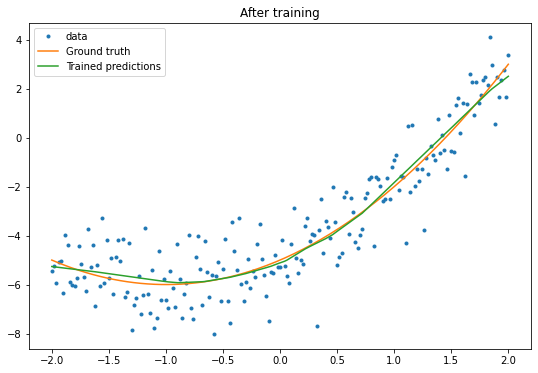

In [35]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Trained predictions')
plt.title('After training')
plt.legend();

<br>
<br>

That's working, but remember that implementations of common training utilities are available in the `tf.keras` module. So consider using those before writing your own. To start with, the `Model.compile` and  `Model.fit` methods implement a training loop for you:

In [36]:
new_model = Model(64)

In [37]:
new_model.compile(loss=tf.keras.losses.MSE,
                  optimizer=tf.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

model.save('./save_model/1-1_try2')

INFO:tensorflow:Assets written to: ./save_model/1-1_try2\assets


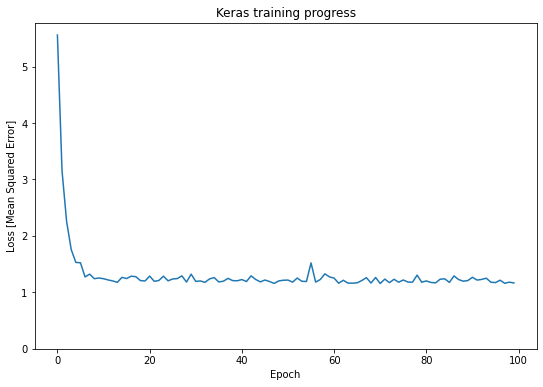

In [38]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

<br>
<br>

Refer to [Basic training loops](basic_training_loops.ipynb) and the [Keras guide](https://www.tensorflow.org/guide/keras) for more details.

<br>

```python
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
```

<br>
<br>
<br>